# **CÂU HỎI 1:**
**Kĩ năng có ảnh hưởng đến mức lương của các vị trí ứng tuyển vào công ty hay không ?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Đọc dữ liệu từ file `./data.csv` và lưu vào dataframe `df`

In [2]:
df = pd.read_csv('./data.csv', index_col = 'Unnamed: 0')
df.head()

,Title,Company,DeadlineHoSo,Salary,Quantity,Hthuc,CapBac,GioiTinh,KinhNghiem,DiaChi,Skill,JobData
0,Business Analyst,Asilla Việt Nam,2023-01-31,"(1200, 1400)",5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Cầu Giấy,Hà Nội",NaN,- Collaborate with Product Manager to understa...
1,Android Developer,FPT Software,2023-04-30,NaN,5,Toàn thời gian,Nhân viên,Không yêu cầu,3.0,"Hà Nội,Cầu Giấy,Thạch Thất",NaN,"• Working in Global delivery team (US, China, ..."
2,Nhân Viên IT,Công ty CPXD&PTHT Tây Hồ,2023-01-30,NaN,1,Toàn thời gian,Nhân viên,Nam,0.0,"Vĩnh Phúc,TP Vĩnh Yên",NaN,Chịu trách nhiệm giám sát hoạt động pho...
3,Chuyên Viên Quản Trị Cơ Sở Dữ Liệu (Database A...,Ngân Hàng Thương Mại Cổ Phần Kiên Long,2023-01-31,"(600.0, 1200.0)",1,Toàn thời gian,Nhân viên,Nam,3.0,"Hà Nội,Nam Từ Liêm","Linux,Oracle,SQL,Unix","Hệ thống cơ sở dữ liệu Oracle,Hệ thống Oracle ..."
4,Java Developer,CÔNG TY TNHH YOUMED VIỆT NAM,2023-01-31,NaN,3,Toàn thời gian,Nhân viên,Không yêu cầu,1.0,"Hồ Chí Minh,Quận 10","Java,Message Queue,Back-End Web Development","Phát triển tính năng đặt khám, telemedicine, s..."


In [3]:
df.shape

(2336, 12)

## 1. Tiền xử lý dữ liệu để trả lời câu hỏi

**Ta thống kê theo mức lương tối đa đạt được.**

Ở đây, ta sẽ không tính các giá trị mức lương là NaN, vì các giá trị NaN sẽ mang ý nghĩa là `'Lương thỏa thuận'`. Mức lương này ta thường sẽ không biết được.

Ta cũng sẽ không xét các vị trí có skill là NaN.

In [4]:
df = df[['Salary', 'Skill']].dropna()
df.shape

(683, 2)

**NHẬN XÉT:** Ta có thể thấy, công việc có mức lương và kĩ năng cố định giảm khá mạnh so với dữ liệu ban đầu (từ 2336 giảm xuống còn 683 công việc) 

**Tiếp theo, ta sẽ tiền xử lý riêng cột `'Salary'`**

- Ta thấy các dữ liệu của Salary khi truyền vào sẽ là dạng 1 string. 
- Do đó, trước khi thực hiện ta phải chuyển string về tuple.

In [5]:
def maxSalary(s):
    return tuple(map(np.float64, s[1:-1].split(', ')))[1]
df['Salary'] = df['Salary'].apply(maxSalary)

**Cuối cùng, ta sẽ tiến hành xử lý riêng cột `'Skill'`**

Bằng cách tách các cột với dạng string thành một chuỗi (array), bởi vì để xét từng kĩ năng, chúng ta phải tách các kĩ năng được liệt kê thành 1 mảng chứa các kĩ năng, điều này giúp ta dễ xử lý hơn trong quá trình thực hiện trả lời câu hỏi.

In [6]:
df['Skill'] = df['Skill'].str.replace(', ', ',').str.replace(' ,', ',')
df['Skill'] = df['Skill'].str.split(',')

## 2. Trả lời câu hỏi
**Ta sẽ xét mức lương cao nhất mà công việc đó đáp ứng cho người đăng ký.**

### Mức độ yêu cầu của các skill trong công việc


Để đếm số lần mà các skill được công việc yêu cầu, với mỗi phần tử trong mảng của mỗi dòng, ta sẽ tách ra thành từng dòng riêng lẽ khác nhau.

In [7]:
df_skill = df['Skill'].explode()

Sau đó, ta sẽ đếm số lượng các kĩ năng mà ta vừa tách.

In [8]:
df_skill = df_skill.value_counts()
df_skill.head()

Javascript    105
Java          100
HTML           67
PHP            63
MySQL          61
Name: Skill, dtype: int64

In [9]:
df_skill.shape

(298,)

Do số lượng kĩ năng khá nhiều, nên ta chỉ xét top 20 kĩ năng có số lược yêu cầu nhiều nhất.

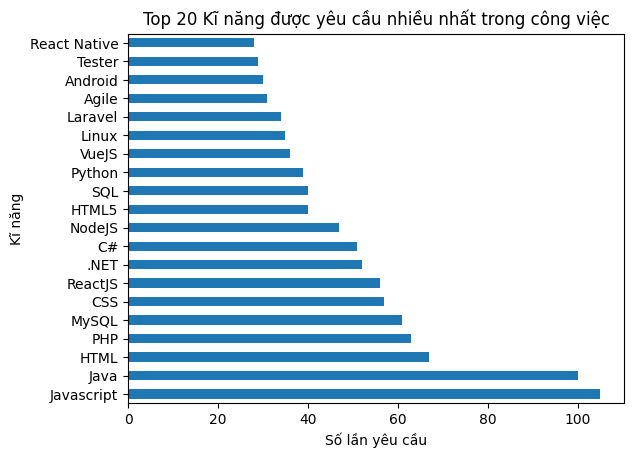

In [10]:
df_skill = df_skill[:20]
df_skill.plot.barh()
plt.title('Top 20 Kĩ năng được yêu cầu nhiều nhất trong công việc')
plt.xlabel('Số lần yêu cầu')
plt.ylabel('Kĩ năng')
plt.show()

**NHẬN XÉT:**
- Ta thấy, ngày nay các công ty yêu cầu rất nhiều kĩ năng, từ kĩ năng cứng đến kĩ năng mềm.
- Tuy nhiên, trong top 20 kĩ năng, hầu như các kĩ năng cứng được ưu tiên và trọng dụng nhiều hơn, nhất là 2 kĩ năng Java và Javascript.
- Do đó, ta có thể nói 2 kĩ năng này là định hướng của hiện tại, yêu cầu mà các công ty chủ yếu nhắm đến.

### Tiếp theo ta sẽ tính mức lương trung bình của tất cả các skill

Tương tự như trên, khi ta tách 1 dòng array thành nhiều dòng riêng lẽ khác nhau.

Lần này, ta sẽ tách `df` với cột `'Skill'` thành nhiều dòng khác nhau, với mức lương tương ứng với từng kĩ năng của dòng trước đó. 

Ví dụ: 
- df ban đầu:

|**Salary**|**Skill**|
|-----|-----------------------------|
|1400|['Unix', 'SQL', 'Python']|
- df sau khi tách:

|**Salary**|**Skill**|
|-----|-----------------------------|
|1400|'Unix'|
|1400|'SQL'|
|1400|'Python'|

In [11]:
df_salary_skill = df.apply(pd.Series.explode)

Sau đó, ta sẽ phân các kĩ năng khác nhau (gộp các kĩ năng giống nhau lại), và tính mức lương trung bình ***(mean)*** của từng kĩ năng đó.

In [12]:
df_salary_skill = df_salary_skill.groupby(['Skill']).mean()

Kế tiếp, ta sẽ sắp xếp các kĩ năng theo mức lương giảm dần.

In [13]:
df_salary_skill = df_salary_skill.sort_values(by = ['Salary'], ascending = False)
df_salary_skill.head()

,Salary
Skill,
Bridge Engineer,3000.0
Ruby,2500.0
webpack,2500.0
IOT,2450.0
Full Stack,2305.0


In [14]:
df_salary_skill.shape

(298, 1)

Tương tự như khi xét kĩ năng nào được yêu cầu nhiều nhất trong công việc, ta cũng sẽ chọn khoảng 20 kĩ năng (top 20) có mức lương cao nhất. 

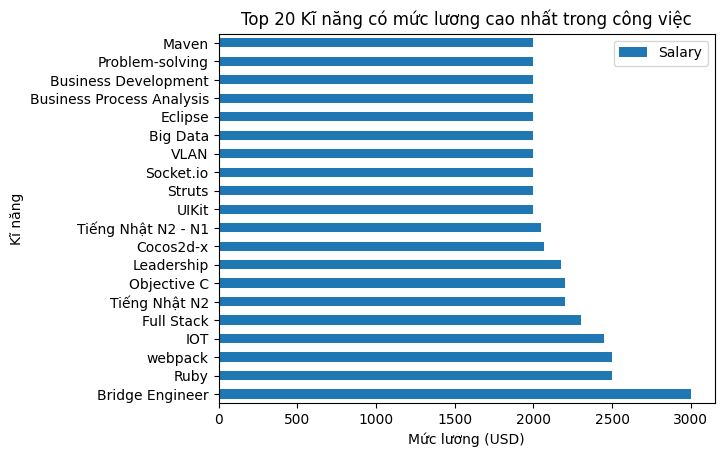

In [15]:
df_salary_skill_20 = df_salary_skill[:20]
df_salary_skill_20.plot.barh()
plt.title('Top 20 Kĩ năng có mức lương cao nhất trong công việc')
plt.xlabel('Mức lương (USD)')
plt.ylabel('Kĩ năng')
plt.show()

**NHẬN XÉT:**
- Ta có thể thấy, mức lương cơ bản (trung bình) của các công việc mà yêu cầu kĩ năng như hình trên là từ 2000 UDS trở lên với đỉnh điểm là 3000 USD.
- Trong số các kĩ năng của hình trên thì không có bất kì kĩ năng nào là phổ biến (hình 1).

### So sánh mức độ phổ biến và mức lương của các kĩ năng được nhiều công việc yêu cầu

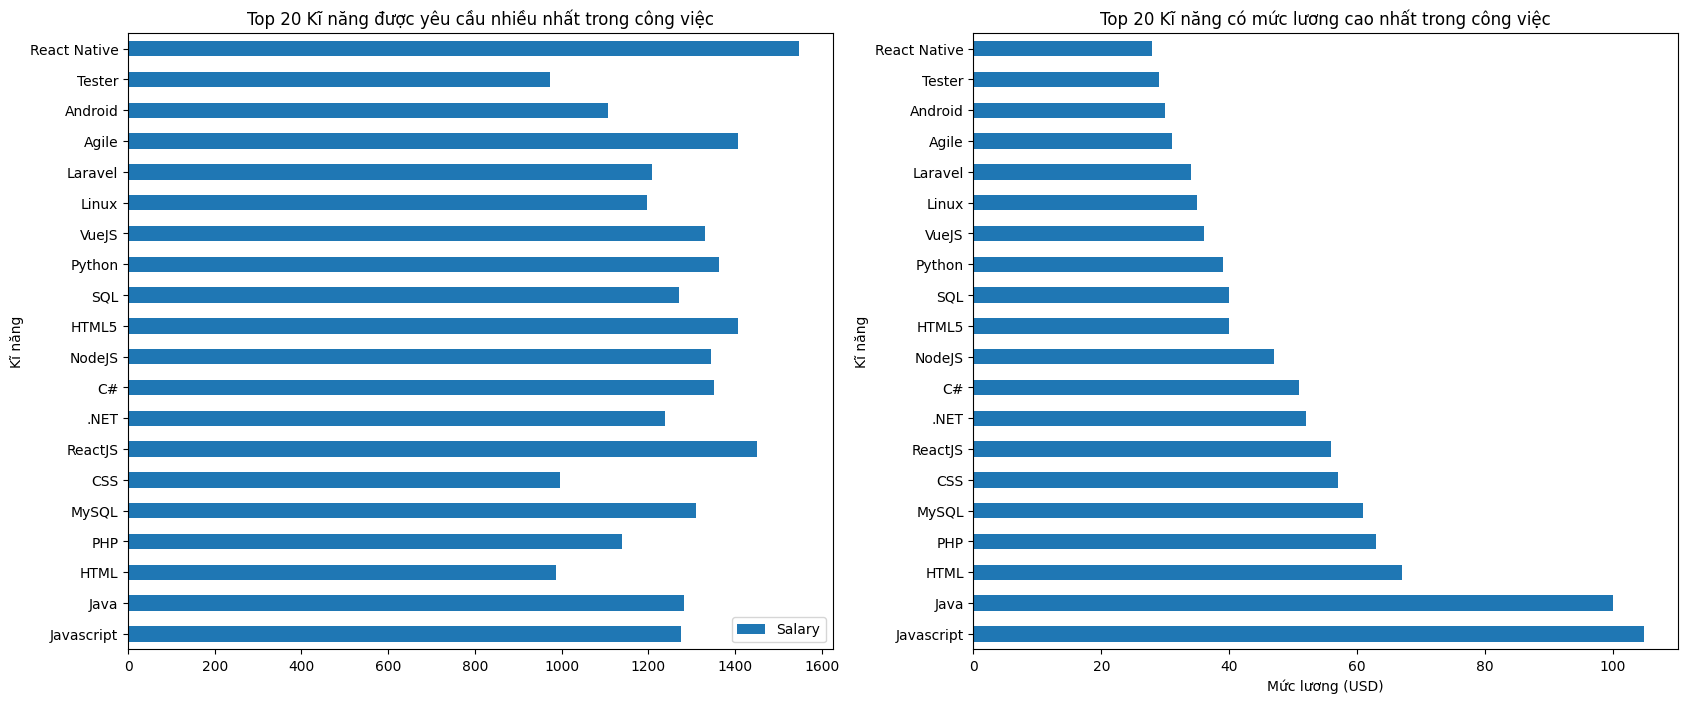

In [16]:
fig, axs = plt.subplots(1, 2, figsize = (20, 8))

df_skill.plot.barh(ax = axs[1])
axs[1].set_title('Top 20 Kĩ năng được yêu cầu nhiều nhất trong công việc')
axs[1].set_xlabel('Số lần yêu cầu')
axs[1].set_ylabel('Kĩ năng')

df_salary_skill.loc[df_skill.index].plot.barh(ax = axs[0])
axs[0].set_title('Top 20 Kĩ năng có mức lương cao nhất trong công việc')
axs[0].set_xlabel('Mức lương (USD)')
axs[0].set_ylabel('Kĩ năng')

plt.show()

**NHẬN XÉT:**
- Ta có thể thấy rõ, 2 biểu đồ không giống nhau về hình dáng. Ở biểu đồ 1, các mức lương phân bố không đồng đều (tăng dần hoặc giảm dần) như hình 2.
- Điều này chứng tỏ 1 điều là mức độ phổ biến của kĩ năng chưa hẵn đã quyết định được giá trị của mức lương mà chúng ta nhận được.

**GIẢI THÍCH:** 

Mức lương còn bị phụ thuộc vào cấp bậc, kinh nghiệm và độ quan trọng của kĩ năng, chứ không phải chỉ đơn thuần là kĩ năng nào phổ biến thì mức lương cũng sẽ cao.

## **KẾT LUẬN**
- Mức lương không hoàn toàn bị ảnh hưởng bởi các kĩ năng, không phải kĩ năng cần nhiều nhất là kĩ năng có mức lương cao nhất, mà những kĩ năng khó thành thạo chính là chìa khóa để lương được cao.
- Do đó, sở hữu càng nhiều kĩ năng trong công việc thì tỉ lệ lương cao càng nhiều.